
Project Name-PRCP-1023-COVID-19 PREDICTION

Team Members:

1.Ashish Ray Mohapatra

2.Ancil Xavier

3.Ramchandra Rao
    

 # Business Case : EDA OF COVID-19 DEATH CASES

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df = pd.read_csv('time_series_covid19_deaths_global.csv')

In [3]:
df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [4]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,Albania,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,Algeria,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,Andorra,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,Angola,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,Western Sahara,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,Yemen,0,0,0,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,Zambia,0,0,0,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


### Transpose data

In [5]:
df = df.melt(id_vars="Country/Region", 
        var_name="Date", 
        value_name="Deaths")

In [6]:
df.head()

,Country/Region,Date,Deaths
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [7]:
df

,Country/Region,Date,Deaths
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
64899,West Bank and Gaza,9/21/20,265
64900,Western Sahara,9/21/20,1
64901,Yemen,9/21/20,586
64902,Zambia,9/21/20,331


In [8]:
# time series model requires Date/time to be in the datetime type not object type.
# so convert it to datetime.

df['Date']=pd.to_datetime(df['Date'])

In [9]:
#df=df.groupby('Date').sum()

In [10]:
df

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
64899,West Bank and Gaza,2020-09-21,265
64900,Western Sahara,2020-09-21,1
64901,Yemen,2020-09-21,586
64902,Zambia,2020-09-21,331


In [11]:
df1 = df

In [12]:
df1 = df1.groupby('Country/Region').sum()

In [13]:
df1

,Deaths
Country/Region,
Afghanistan,126077
Albania,20165
Algeria,158731
Andorra,8376
Angola,6645
...,...
West Bank and Gaza,9603
Western Sahara,119
Yemen,48329


In [14]:
df2 = df

In [15]:
df2

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
64899,West Bank and Gaza,2020-09-21,265
64900,Western Sahara,2020-09-21,1
64901,Yemen,2020-09-21,586
64902,Zambia,2020-09-21,331


In [16]:
df2['Month'] = pd.DatetimeIndex(df2['Date']).month

In [17]:
df2

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-22,0,1
1,Albania,2020-01-22,0,1
2,Algeria,2020-01-22,0,1
3,Andorra,2020-01-22,0,1
4,Angola,2020-01-22,0,1
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,265,9
64900,Western Sahara,2020-09-21,1,9
64901,Yemen,2020-09-21,586,9
64902,Zambia,2020-09-21,331,9


In [18]:
df2.Month = df2.Month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep'})

In [19]:
df2

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,265,Sep
64900,Western Sahara,2020-09-21,1,Sep
64901,Yemen,2020-09-21,586,Sep
64902,Zambia,2020-09-21,331,Sep


In [20]:
df2.Month.value_counts()

Mar    8246
Aug    8246
May    8246
Jul    8246
Jun    7980
Apr    7980
Feb    7714
Sep    5586
Jan    2660
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

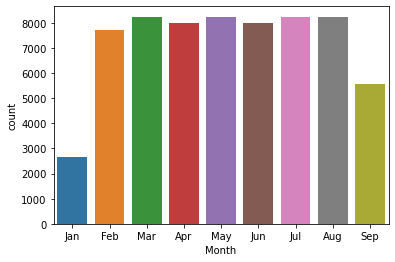

In [21]:
df2.Month.value_counts()
sns.countplot(x='Month',data=df2)

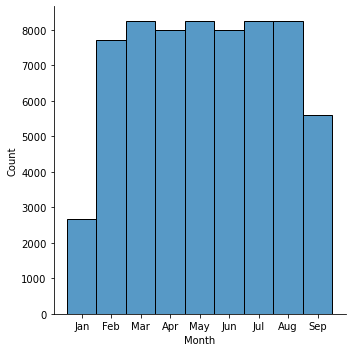

In [22]:
sns.displot(df2.Month, kind='hist')

In [23]:
df3 = df2

In [24]:
df3 = df3.groupby('Month').sum()

In [25]:
df3

,Deaths
Month,
Apr,4347375
Aug,23801937
Feb,46910
Jan,889
Jul,18284141
Jun,13294645
Mar,398323
May,9657801
Sep,19171960


In [26]:
df4=df2

In [27]:
df4.groupby(['Country/Region','Month'])['Deaths'].mean().unstack()

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep
Country/Region,,,,,,,,,
Afghanistan,28.666667,1355.677419,0.0,0.0,1077.161290,496.900000,0.935484,161.096774,1422.333333
Albania,24.266667,224.032258,0.0,0.0,106.516129,40.700000,2.935484,31.451613,328.714286
Algeria,306.566667,1368.645161,0.0,0.0,1055.483871,786.666667,10.451613,545.193548,1598.142857
Andorra,30.566667,52.645161,0.0,0.0,52.000000,51.500000,1.258065,48.967742,53.000000
Angola,2.000000,84.741935,0.0,0.0,29.516129,7.000000,0.193548,2.741935,130.571429
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,1.700000,113.677419,0.0,0.0,47.258065,3.300000,0.193548,2.290323,208.904762
Western Sahara,0.000000,1.000000,0.0,0.0,1.000000,1.000000,0.000000,0.193548,1.000000
Yemen,0.066667,532.806452,0.0,0.0,417.161290,197.733333,0.000000,25.483871,578.857143


In [28]:
df5=df2

In [29]:
df5 = df5.groupby(['Country/Region','Month'])['Deaths'].sum().unstack()

In [30]:
df5

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep
Country/Region,,,,,,,,,
Afghanistan,860,42026,0,0,33392,14907,29,4994,29869
Albania,728,6945,0,0,3302,1221,91,975,6903
Algeria,9197,42428,0,0,32720,23600,324,16901,33561
Andorra,917,1632,0,0,1612,1545,39,1518,1113
Angola,60,2627,0,0,915,210,6,85,2742
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,51,3524,0,0,1465,99,6,71,4387
Western Sahara,0,31,0,0,31,30,0,6,21
Yemen,2,16517,0,0,12932,5932,0,790,12156


In [31]:
df5['Total_Deaths'] = df5.iloc[:,0:].sum(axis=1)

In [32]:
df5

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep,Total_Deaths
Country/Region,,,,,,,,,,
Afghanistan,860,42026,0,0,33392,14907,29,4994,29869,126077
Albania,728,6945,0,0,3302,1221,91,975,6903,20165
Algeria,9197,42428,0,0,32720,23600,324,16901,33561,158731
Andorra,917,1632,0,0,1612,1545,39,1518,1113,8376
Angola,60,2627,0,0,915,210,6,85,2742,6645
...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,51,3524,0,0,1465,99,6,71,4387,9603
Western Sahara,0,31,0,0,31,30,0,6,21,119
Yemen,2,16517,0,0,12932,5932,0,790,12156,48329


In [33]:
df6 = df5

In [34]:
df6.sort_values('Total_Deaths', ascending=False)

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep,Total_Deaths
Country/Region,,,,,,,,,,
US,1057534,5264077,1,0,4327115,3572191,25324,2788799,4046533,21081574
Brazil,66571,3345405,0,0,2370476,1353392,976,509030,2735719,10381569
United Kingdom,457216,1284798,0,0,1270661,1182674,12576,1030749,876002,6114676
Italy,644171,1095146,102,0,1084927,1028841,116616,973585,747529,5690917
Mexico,19390,1749213,0,0,1164238,562682,136,165485,1465827,5126971
...,...,...,...,...,...,...,...,...,...,...
Bhutan,0,0,0,0,0,0,0,0,0,0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0
Saint Lucia,0,0,0,0,0,0,0,0,0,0


In [35]:
df6 = df6.loc[df6['Total_Deaths']==0]

In [36]:
df6

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep,Total_Deaths
Country/Region,,,,,,,,,,
Bhutan,0,0,0,0,0,0,0,0,0,0
Cambodia,0,0,0,0,0,0,0,0,0,0
Dominica,0,0,0,0,0,0,0,0,0,0
Eritrea,0,0,0,0,0,0,0,0,0,0
Grenada,0,0,0,0,0,0,0,0,0,0
Holy See,0,0,0,0,0,0,0,0,0,0
Laos,0,0,0,0,0,0,0,0,0,0
Mongolia,0,0,0,0,0,0,0,0,0,0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0


In [37]:
df5

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep,Total_Deaths
Country/Region,,,,,,,,,,
Afghanistan,860,42026,0,0,33392,14907,29,4994,29869,126077
Albania,728,6945,0,0,3302,1221,91,975,6903,20165
Algeria,9197,42428,0,0,32720,23600,324,16901,33561,158731
Andorra,917,1632,0,0,1612,1545,39,1518,1113,8376
Angola,60,2627,0,0,915,210,6,85,2742,6645
...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,51,3524,0,0,1465,99,6,71,4387,9603
Western Sahara,0,31,0,0,31,30,0,6,21,119
Yemen,2,16517,0,0,12932,5932,0,790,12156,48329


In [38]:
df7=df5

In [39]:
df7 = df7.sort_values('Total_Deaths', ascending=False)

In [40]:
df7

Month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Sep,Total_Deaths
Country/Region,,,,,,,,,,
US,1057534,5264077,1,0,4327115,3572191,25324,2788799,4046533,21081574
Brazil,66571,3345405,0,0,2370476,1353392,976,509030,2735719,10381569
United Kingdom,457216,1284798,0,0,1270661,1182674,12576,1030749,876002,6114676
Italy,644171,1095146,102,0,1084927,1028841,116616,973585,747529,5690917
Mexico,19390,1749213,0,0,1164238,562682,136,165485,1465827,5126971
...,...,...,...,...,...,...,...,...,...,...
Bhutan,0,0,0,0,0,0,0,0,0,0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0
Saint Lucia,0,0,0,0,0,0,0,0,0,0


In [41]:
df7.drop(columns=['Apr','Aug','Feb','Jan','Jul','Jun','Mar','May','Sep'], axis=1, inplace=True)

In [42]:
df7

Month,Total_Deaths
Country/Region,
US,21081574
Brazil,10381569
United Kingdom,6114676
Italy,5690917
Mexico,5126971
...,...
Bhutan,0
Saint Kitts and Nevis,0
Saint Lucia,0


### Top 5 countries with maximum death cases

In [43]:
df8 = df7.head()

In [44]:
df8

Month,Total_Deaths
Country/Region,
US,21081574
Brazil,10381569
United Kingdom,6114676
Italy,5690917
Mexico,5126971


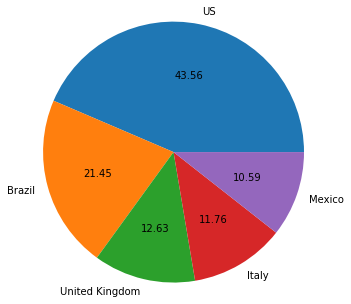

In [45]:
labels=['US','Brazil','United Kingdom','Italy','Mexico']
sizes=[21081574,10381569,6114676,5690917,5126971]
plt.pie(sizes,labels=labels,colors=None,radius=1.5,autopct='%.2f')
plt.show()

### Analysing the Death cases in countires individually

### India

In [46]:
df2

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,265,Sep
64900,Western Sahara,2020-09-21,1,Sep
64901,Yemen,2020-09-21,586,Sep
64902,Zambia,2020-09-21,331,Sep


In [47]:
df_Ind = df2

In [48]:
df_Ind = df_Ind.loc[df_Ind['Country/Region']== 'India']

In [49]:
df_Ind

,Country/Region,Date,Deaths,Month
143,India,2020-01-22,0,Jan
409,India,2020-01-23,0,Jan
675,India,2020-01-24,0,Jan
941,India,2020-01-25,0,Jan
1207,India,2020-01-26,0,Jan
...,...,...,...,...
63717,India,2020-09-17,84372,Sep
63983,India,2020-09-18,85619,Sep
64249,India,2020-09-19,86752,Sep
64515,India,2020-09-20,87882,Sep


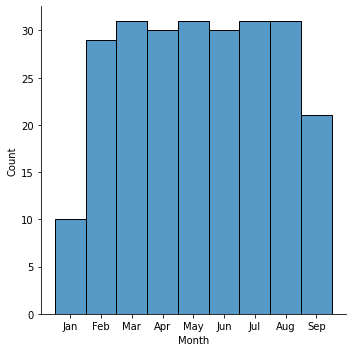

In [50]:
sns.displot(df_Ind.Month, kind='hist')

In [51]:
df_Ind = df_Ind.groupby('Month').sum()

In [52]:
df_Ind

,Deaths
Month,
Apr,14417
Aug,1582152
Feb,0
Jan,0
Jul,812555
Jun,331856
Mar,226
May,94154
Sep,1626335


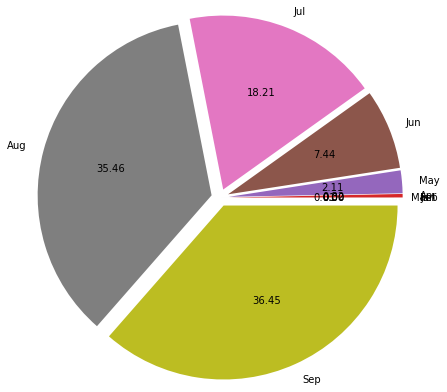

In [53]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,226,14417,94154,331856,812555,1582152,1626335]
explode=[0.1,0.1,0,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

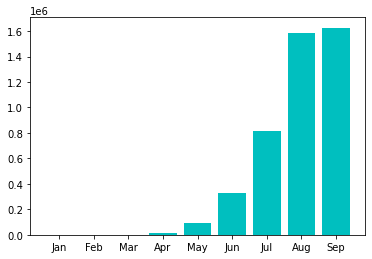

In [54]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,226,14417,94154,331856,812555,1582152,1626335]
plt.bar(labels,sizes,color='c')
plt.show()

### Brazil

In [55]:
df2

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,265,Sep
64900,Western Sahara,2020-09-21,1,Sep
64901,Yemen,2020-09-21,586,Sep
64902,Zambia,2020-09-21,331,Sep


In [56]:
df_Br = df2

In [57]:
df_Br = df_Br.loc[df_Br['Country/Region']== 'Brazil']

In [58]:
df_Br

,Country/Region,Date,Deaths,Month
30,Brazil,2020-01-22,0,Jan
296,Brazil,2020-01-23,0,Jan
562,Brazil,2020-01-24,0,Jan
828,Brazil,2020-01-25,0,Jan
1094,Brazil,2020-01-26,0,Jan
...,...,...,...,...
63604,Brazil,2020-09-17,134935,Sep
63870,Brazil,2020-09-18,135793,Sep
64136,Brazil,2020-09-19,136532,Sep
64402,Brazil,2020-09-20,136895,Sep


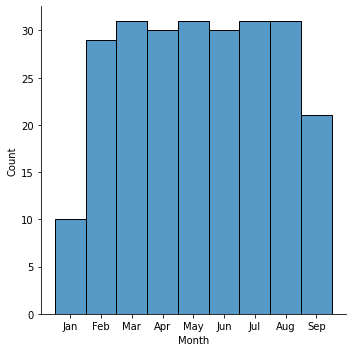

In [59]:
sns.displot(df_Br.Month, kind='hist')

In [60]:
df_Br = df_Br.groupby('Month').sum()

In [61]:
df_Br

,Deaths
Month,
Apr,66571
Aug,3345405
Feb,0
Jan,0
Jul,2370476
Jun,1353392
Mar,976
May,509030
Sep,2735719


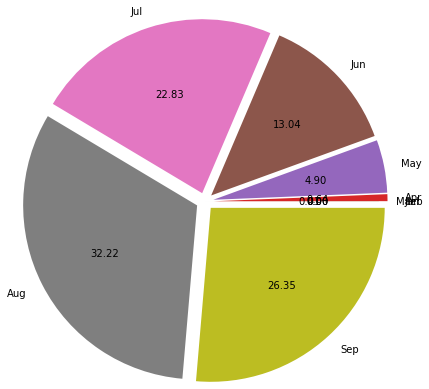

In [62]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,976,66571,509030,1353392,2370476,3345405,2735719]
explode=[0.1,0.1,0,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

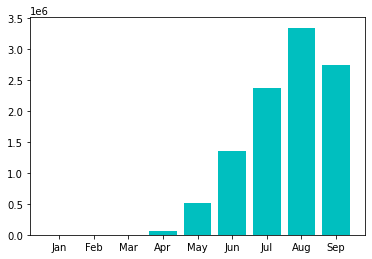

In [63]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,976,66571,509030,1353392,2370476,3345405,2735719]
plt.bar(labels,sizes,color='c')
plt.show()

### US

In [64]:
df2

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,265,Sep
64900,Western Sahara,2020-09-21,1,Sep
64901,Yemen,2020-09-21,586,Sep
64902,Zambia,2020-09-21,331,Sep


In [65]:
df_US = df2

In [66]:
df_US = df_US.loc[df_US['Country/Region']== 'US']

In [67]:
df_US

,Country/Region,Date,Deaths,Month
242,US,2020-01-22,0,Jan
508,US,2020-01-23,0,Jan
774,US,2020-01-24,0,Jan
1040,US,2020-01-25,0,Jan
1306,US,2020-01-26,0,Jan
...,...,...,...,...
63816,US,2020-09-17,197633,Sep
64082,US,2020-09-18,198570,Sep
64348,US,2020-09-19,199282,Sep
64614,US,2020-09-20,199509,Sep


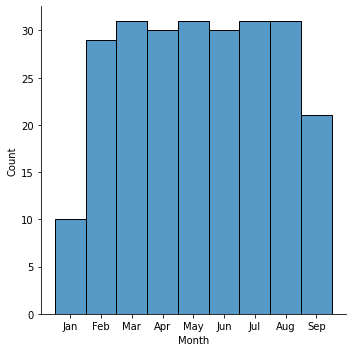

In [68]:
sns.displot(df_US.Month, kind='hist')

In [69]:
df_US = df_US.groupby('Month').sum()

In [70]:
df_US

,Deaths
Month,
Apr,1057534
Aug,5264077
Feb,1
Jan,0
Jul,4327115
Jun,3572191
Mar,25324
May,2788799
Sep,4046533


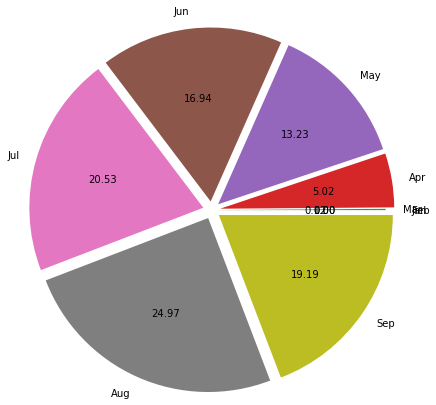

In [71]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,1,25324,1057534,2788799,3572191,4327115,5264077,4046533]
explode=[0.1,0.1,0,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

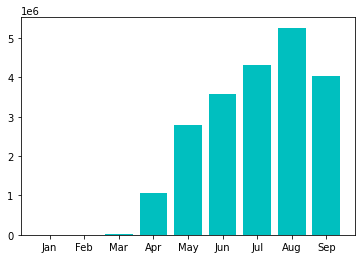

In [72]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,1,25324,1057534,2788799,3572191,4327115,5264077,4046533]
plt.bar(labels,sizes,color='c')
plt.show()

### Russia

In [73]:
df2

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,265,Sep
64900,Western Sahara,2020-09-21,1,Sep
64901,Yemen,2020-09-21,586,Sep
64902,Zambia,2020-09-21,331,Sep


In [74]:
df_Rus= df2

In [75]:
df_Rus = df_Rus.loc[df_Rus['Country/Region']== 'Russia']

In [76]:
df_Rus

,Country/Region,Date,Deaths,Month
208,Russia,2020-01-22,0,Jan
474,Russia,2020-01-23,0,Jan
740,Russia,2020-01-24,0,Jan
1006,Russia,2020-01-25,0,Jan
1272,Russia,2020-01-26,0,Jan
...,...,...,...,...
63782,Russia,2020-09-17,18996,Sep
64048,Russia,2020-09-18,19128,Sep
64314,Russia,2020-09-19,19270,Sep
64580,Russia,2020-09-20,19349,Sep


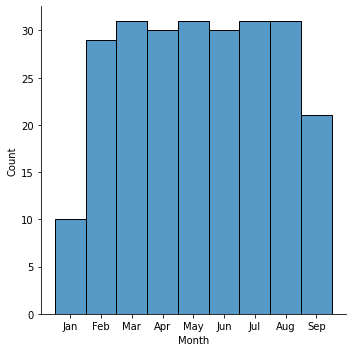

In [77]:
sns.displot(df_Rus.Month, kind='hist')

In [78]:
df_Rus = df_Rus.groupby('Month').sum()

In [79]:
df_Rus

,Deaths
Month,
Apr,10123
Aug,484136
Feb,0
Jan,0
Jul,366477
Jun,215268
Mar,54
May,82313
Sep,384775


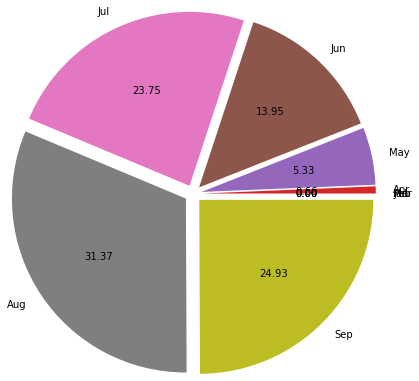

In [80]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,54,10123,82313,215268,366477,484136,384775]
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

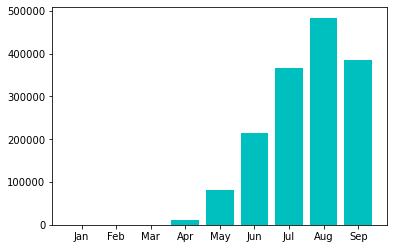

In [81]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,54,10123,82313,215268,366477,484136,384775]
plt.bar(labels,sizes,color='c')
plt.show()

### Israel

In [82]:
df2

,Country/Region,Date,Deaths,Month
0,Afghanistan,2020-01-22,0,Jan
1,Albania,2020-01-22,0,Jan
2,Algeria,2020-01-22,0,Jan
3,Andorra,2020-01-22,0,Jan
4,Angola,2020-01-22,0,Jan
...,...,...,...,...
64899,West Bank and Gaza,2020-09-21,265,Sep
64900,Western Sahara,2020-09-21,1,Sep
64901,Yemen,2020-09-21,586,Sep
64902,Zambia,2020-09-21,331,Sep


In [83]:
df_Is = df2

In [84]:
df_Is = df_Is.loc[df_Is['Country/Region']== 'Israel']

In [85]:
df_Is

,Country/Region,Date,Deaths,Month
148,Israel,2020-01-22,0,Jan
414,Israel,2020-01-23,0,Jan
680,Israel,2020-01-24,0,Jan
946,Israel,2020-01-25,0,Jan
1212,Israel,2020-01-26,0,Jan
...,...,...,...,...
63722,Israel,2020-09-17,1169,Sep
63988,Israel,2020-09-18,1196,Sep
64254,Israel,2020-09-19,1226,Sep
64520,Israel,2020-09-20,1256,Sep


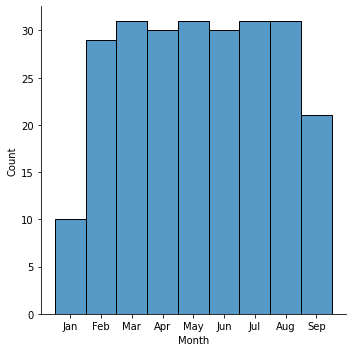

In [86]:
sns.displot(df_Is.Month, kind='hist')

In [87]:
df_Is = df_Is.groupby('Month').sum()

In [88]:
df_Is

,Deaths
Month,
Apr,3960
Aug,22194
Feb,0
Jan,0
Jul,12316
Jun,9082
Mar,94
May,8164
Sep,23007


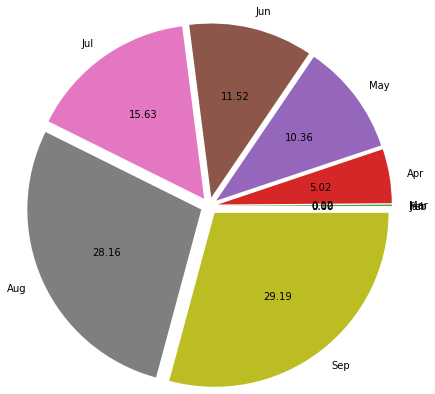

In [89]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,94,3960,8164,9082,12316,22194,23007]
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(sizes,labels=labels,colors=None,explode=explode,radius=2,autopct='%.2f')
plt.show()

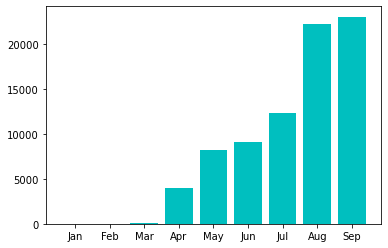

In [90]:
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
sizes=[0,0,94,3960,8164,9082,12316,22194,23007]
plt.bar(labels,sizes,color='c')
plt.show()